In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3


In [3]:
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()


In [103]:
cur.execute("""SELECT HomeTeam,SUM(FTHG) FROM matches
               WHERE Season = '2011'
               GROUP BY HomeTeam;""")
matches1_df = pd.DataFrame(cur.fetchall())
matches1_df.columns = [x[0] for x in cur.description]
matches1_df.head()

,HomeTeam,SUM(FTHG)
0,Aachen,15
1,Arsenal,39
2,Aston Villa,20
3,Augsburg,20
4,Bayern Munich,49


In [104]:
cur.execute("""SELECT *FROM teams;""")
teams_df = pd.DataFrame(cur.fetchall())
teams_df.columns = [x[0] for x in cur.description]
teams_df.head()

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271


In [106]:
cur.execute("""SELECT *FROM matches
               WHERE Season = '2011';""")
matches_df = pd.DataFrame(cur.fetchall())
matches_df.columns = [x[0] for x in cur.description]
matches_df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [14]:
cur.execute("""SELECT *FROM teams_in_matches;""")
teams_in_matches_df = pd.DataFrame(cur.fetchall())
teams_in_matches_df.columns = [x[0] for x in cur.description]
teams_in_matches_df.head()

,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26


In [17]:
cur.execute("""SELECT * FROM Unique_Teams;""")
unique_teams_df = pd.DataFrame(cur.fetchall())
unique_teams_df.columns = [x[0] for x in cur.description]
unique_teams_df.head()

,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5


In [99]:
cur.execute("""SELECT  SUM(FTHG) AS total_home_goals 
                FROM matches
               JOIN  teams_in_matches
               USING (Match_ID)
               WHERE Season = '2011'
               GROUP BY HomeTeam;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,total_home_goals
0,30
1,78
2,40
3,40
4,98


In [93]:
cur.execute("""SELECT HomeTeam AS Team ,SUM(FTHG) AS home_goals FROM matches
               WHERE Season = '2011'
               GROUP BY HomeTeam;""")
HomeTeam_df = pd.DataFrame(cur.fetchall())
HomeTeam_df.columns = [x[0] for x in cur.description]
HomeTeam_df.head()

,Team,home_goals
0,Aachen,15
1,Arsenal,39
2,Aston Villa,20
3,Augsburg,20
4,Bayern Munich,49


In [121]:
cur.execute("""SELECT Season,AwayTeam AS Team,SUM(FTAG) AS away_goals FROM matches
               WHERE Season = '2011'
               GROUP BY AwayTeam;""")
AwayTeam_df = pd.DataFrame(cur.fetchall())
AwayTeam_df.columns = [x[0] for x in cur.description]
AwayTeam_df.head()

,Season,Team,away_goals
0,2011,Aachen,15
1,2011,Arsenal,35
2,2011,Aston Villa,17
3,2011,Augsburg,16
4,2011,Bayern Munich,28


In [122]:
team_df = (pd.merge(AwayTeam_df, HomeTeam_df, on='Team'))
team_df.head()

,Season,Team,away_goals,home_goals
0,2011,Aachen,15,15
1,2011,Arsenal,35,39
2,2011,Aston Villa,17,20
3,2011,Augsburg,16,20
4,2011,Bayern Munich,28,49


In [128]:
team_df['total_goals'] = team_df.apply(lambda x: x['away_goals'] + x['home_goals'], axis=1)
team_df.head()

,Season,Team,away_goals,home_goals,total_goals
0,2011,Aachen,15,15,30
1,2011,Arsenal,35,39,74
2,2011,Aston Villa,17,20,37
3,2011,Augsburg,16,20,36
4,2011,Bayern Munich,28,49,77


In [129]:
Team_wins = []
for x in range(0,len(matches_df)):
   if matches_df.FTR[x] == 'H':
       Team_wins.append(matches_df.HomeTeam[x])
   if matches_df.FTR[x] == 'A':
       Team_wins.append(matches_df.AwayTeam[x])
Team_wins

['Bayern Munich',
 'Bayern Munich',
 'Bayern Munich',
 'Mainz',
 "M'gladbach",
 'Bayern Munich',
 'Bayern Munich',
 'Hannover',
 'Leverkusen',
 'Bayern Munich',
 'Bayern Munich',
 'Bayern Munich',
 'Bayern Munich',
 'Dortmund',
 'Dortmund',
 'Dortmund',
 'Dortmund',
 'Hoffenheim',
 'Dortmund',
 'Dortmund',
 'Hannover',
 'Dortmund',
 'Dortmund',
 'Dortmund',
 'Dortmund',
 'Dortmund',
 'Dortmund',
 'Dresden',
 'Ein Frankfurt',
 'Greuther Furth',
 'Fortuna Dusseldorf',
 'Ingolstadt',
 'Cottbus',
 'St Pauli',
 'Union Berlin',
 'Dresden',
 'Dresden',
 'Karlsruhe',
 'Dresden',
 'Duisburg',
 'Dresden',
 'Karlsruhe',
 'Munich 1860',
 'Hansa Rostock',
 'St Pauli',
 'Ein Frankfurt',
 'Greuther Furth',
 'Bochum',
 'Duisburg',
 'Duisburg',
 'Ein Frankfurt',
 'Ein Frankfurt',
 'Ein Frankfurt',
 'Ein Frankfurt',
 'Duisburg',
 'Ein Frankfurt',
 'Ein Frankfurt',
 'Karlsruhe',
 'Ein Frankfurt',
 'Paderborn',
 'St Pauli',
 'Ein Frankfurt',
 'Munich 1860',
 'Ein Frankfurt',
 'Bayern Munich',
 'Dortmund',

In [142]:
list_count = []
for x in team_df['Team']:
    list_count.append(Team_wins.count(x))
    
list_count

[6,
 21,
 7,
 8,
 23,
 8,
 10,
 10,
 10,
 18,
 8,
 25,
 12,
 10,
 20,
 8,
 15,
 8,
 16,
 7,
 10,
 14,
 20,
 8,
 12,
 5,
 7,
 10,
 8,
 4,
 9,
 15,
 14,
 17,
 9,
 28,
 28,
 17,
 19,
 12,
 12,
 17,
 10,
 20,
 18,
 11,
 15,
 11,
 12,
 20,
 14,
 11,
 13,
 11,
 13,
 5]

In [131]:
team_df['number_of_wins'] = list_count

In [135]:
team_df['number_of_wins'].head()

0     6
1    21
2     7
3     8
4    23
Name: number_of_wins, dtype: int64

In [134]:
team_df.head()

,Season,Team,away_goals,home_goals,total_goals,number_of_wins
0,2011,Aachen,15,15,30,6
1,2011,Arsenal,35,39,74,21
2,2011,Aston Villa,17,20,37,7
3,2011,Augsburg,16,20,36,8
4,2011,Bayern Munich,28,49,77,23


In [146]:
Team_losses = []
for x in range(0,len(matches_df)):
   if matches_df.FTR[x] == 'A':
       Team_losses.append(matches_df.HomeTeam[x])
   if matches_df.FTR[x] == 'H':
       Team_losses.append(matches_df.AwayTeam[x])
    
Team_losses

['Nurnberg',
 'Stuttgart',
 'Wolfsburg',
 'Bayern Munich',
 'Bayern Munich',
 'Werder Bremen',
 'Schalke 04',
 'Bayern Munich',
 'Bayern Munich',
 'Kaiserslautern',
 'Hertha',
 'Augsburg',
 'FC Koln',
 'Bayern Munich',
 'Freiburg',
 'Hertha',
 'Nurnberg',
 'Dortmund',
 'Hamburg',
 'Schalke 04',
 'Dortmund',
 'FC Koln',
 'Wolfsburg',
 'Bayern Munich',
 'Werder Bremen',
 'Mainz',
 'Kaiserslautern',
 'Bochum',
 'Dresden',
 'Dresden',
 'Dresden',
 'Dresden',
 'Dresden',
 'Dresden',
 'Dresden',
 'Munich 1860',
 'Aachen',
 'Dresden',
 'Braunschweig',
 'Dresden',
 'Duisburg',
 'Duisburg',
 'Duisburg',
 'Duisburg',
 'Duisburg',
 'Duisburg',
 'Duisburg',
 'Duisburg',
 'Erzgebirge Aue',
 'Paderborn',
 'Erzgebirge Aue',
 'Bochum',
 'Frankfurt FSV',
 'Dresden',
 'Ein Frankfurt',
 'Union Berlin',
 'Greuther Furth',
 'Ein Frankfurt',
 'Braunschweig',
 'Ein Frankfurt',
 'Ein Frankfurt',
 'Hansa Rostock',
 'Ein Frankfurt',
 'Aachen',
 'FC Koln',
 'FC Koln',
 'FC Koln',
 'FC Koln',
 'FC Koln',
 'FC Kol

In [147]:
list_count_losses = []
for x in team_df['Team']:
    list_count_losses.append(Team_losses.count(x))
    
list_count_losses

[15,
 10,
 14,
 12,
 7,
 23,
 17,
 22,
 9,
 10,
 15,
 3,
 13,
 15,
 6,
 15,
 12,
 20,
 4,
 13,
 14,
 14,
 4,
 14,
 10,
 17,
 17,
 13,
 13,
 19,
 19,
 10,
 14,
 8,
 13,
 5,
 5,
 11,
 11,
 15,
 16,
 7,
 21,
 10,
 8,
 15,
 11,
 15,
 15,
 9,
 14,
 14,
 17,
 17,
 16,
 23]

In [148]:
team_df['number_of_losses'] = list_count_losses

In [149]:
team_df['number_of_losses']

0     15
1     10
2     14
3     12
4      7
5     23
6     17
7     22
8      9
9     10
10    15
11     3
12    13
13    15
14     6
15    15
16    12
17    20
18     4
19    13
20    14
21    14
22     4
23    14
24    10
25    17
26    17
27    13
28    13
29    19
30    19
31    10
32    14
33     8
34    13
35     5
36     5
37    11
38    11
39    15
40    16
41     7
42    21
43    10
44     8
45    15
46    11
47    15
48    15
49     9
50    14
51    14
52    17
53    17
54    16
55    23
Name: number_of_losses, dtype: int64

In [150]:
team_df

,Season,Team,away_goals,home_goals,total_goals,number_of_wins,number_of_losses
0,2011,Aachen,15,15,30,6,15
1,2011,Arsenal,35,39,74,21,10
2,2011,Aston Villa,17,20,37,7,14
3,2011,Augsburg,16,20,36,8,12
4,2011,Bayern Munich,28,49,77,23,7
5,2011,Blackburn,22,26,48,8,23
6,2011,Bochum,18,23,41,10,17
7,2011,Bolton,23,23,46,10,22
8,2011,Braunschweig,16,21,37,10,9
9,2011,Chelsea,24,41,65,18,10


In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

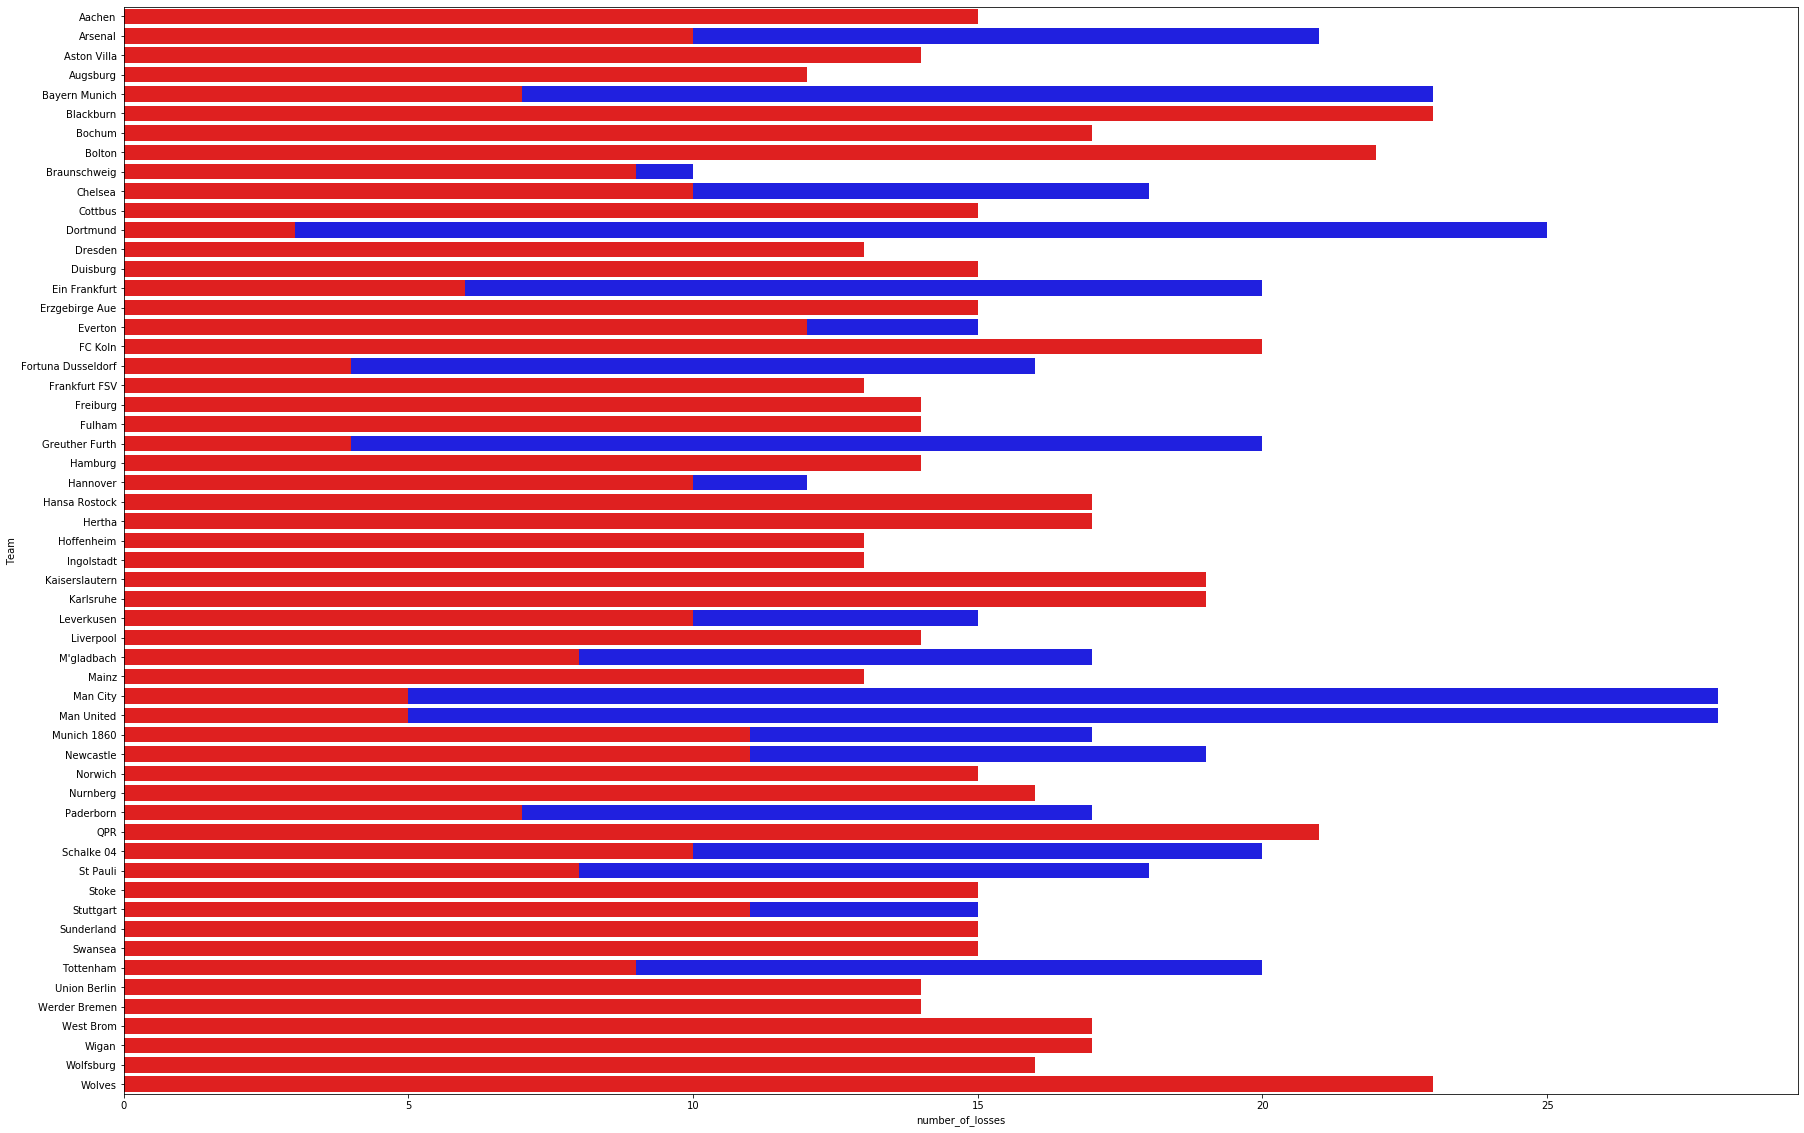

In [162]:
plt.figure(figsize=(30,20))
ax = sns.barplot(x="number_of_wins", y="Team",
            data=team_df, color = 'blue');
ax2 = sns.barplot(x="number_of_losses", y="Team",
            data=team_df, color = 'red');

In [171]:
cur.execute("""SELECT *FROM matches
               WHERE Season = '2011';""")
matches_df = pd.DataFrame(cur.fetchall())
matches_df.columns = [x[0] for x in cur.description]
matches_df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [174]:
Date = list(matches_df.Date.unique())
Date

['2012-03-31',
 '2011-12-11',
 '2011-08-13',
 '2011-11-27',
 '2012-02-18',
 '2012-01-20',
 '2012-02-04',
 '2012-04-21',
 '2011-09-18',
 '2011-10-23',
 '2011-10-01',
 '2012-03-03',
 '2011-08-27',
 '2012-03-17',
 '2011-11-06',
 '2012-05-05',
 '2012-04-11',
 '2011-12-17',
 '2012-02-03',
 '2011-10-29',
 '2012-01-22',
 '2011-12-03',
 '2012-04-14',
 '2012-03-25',
 '2012-03-10',
 '2012-04-07',
 '2011-11-19',
 '2011-10-14',
 '2011-09-24',
 '2012-04-28',
 '2011-12-18',
 '2012-03-02',
 '2012-03-16',
 '2012-02-17',
 '2011-08-06',
 '2011-11-04',
 '2011-09-16',
 '2011-07-15',
 '2012-05-06',
 '2012-02-11',
 '2011-10-02',
 '2012-03-30',
 '2011-10-22',
 '2011-08-26',
 '2011-08-07',
 '2012-02-24',
 '2011-07-17',
 '2012-02-12',
 '2011-08-22',
 '2011-09-09',
 '2012-04-01',
 '2011-09-25',
 '2012-04-20',
 '2011-11-25',
 '2012-03-09',
 '2011-11-07',
 '2011-09-10',
 '2011-08-21',
 '2011-09-26',
 '2012-03-26',
 '2011-10-30',
 '2012-02-13',
 '2012-02-26',
 '2011-12-19',
 '2012-03-11',
 '2011-11-26',
 '2012-04-

In [167]:
import requests

In [170]:
resp = requests.get('https://api.darksky.net/forecast/41200438f6e5fed9a30c5746a5228a33/52.5200,13.4050,2011-12-11T12:00:00?currently,flag')
resp.json()

{'latitude': 52.52,
 'longitude': 13.405,
 'timezone': 'Europe/Berlin',
 'currently': {'time': 1323601200,
  'summary': 'Mostly Cloudy',
  'icon': 'partly-cloudy-day',
  'precipIntensity': 0,
  'precipProbability': 0,
  'temperature': 38.64,
  'apparentTemperature': 31.81,
  'dewPoint': 30.17,
  'humidity': 0.71,
  'windSpeed': 10.35,
  'windGust': 10.35,
  'windBearing': 237,
  'cloudCover': 0.61,
  'uvIndex': 0,
  'visibility': 6.216},
 'hourly': {'summary': 'Mostly cloudy throughout the day.',
  'icon': 'partly-cloudy-day',
  'data': [{'time': 1323558000,
    'summary': 'Mostly Cloudy',
    'icon': 'partly-cloudy-night',
    'precipIntensity': 0,
    'precipProbability': 0,
    'temperature': 37.43,
    'apparentTemperature': 28.54,
    'dewPoint': 30.17,
    'humidity': 0.75,
    'windSpeed': 14.99,
    'windGust': 14.99,
    'windBearing': 259,
    'cloudCover': 0.75,
    'uvIndex': 0,
    'visibility': 6.216},
   {'time': 1323561600,
    'summary': 'Mostly Cloudy',
    'icon': 'p

In [ ]:
for keys i